Corrélations Mid historique → mates_mean selon la taille de la fenêtre :
Fenêtre 1 parties précédentes : Corrélation = 0.160
Fenêtre 2 parties précédentes : Corrélation = 0.181
Fenêtre 3 parties précédentes : Corrélation = 0.126
Fenêtre 4 parties précédentes : Corrélation = 0.161
Fenêtre 5 parties précédentes : Corrélation = 0.139
Fenêtre 6 parties précédentes : Corrélation = 0.227
Fenêtre 7 parties précédentes : Corrélation = 0.238
Fenêtre 8 parties précédentes : Corrélation = 0.228
Fenêtre 9 parties précédentes : Corrélation = 0.205


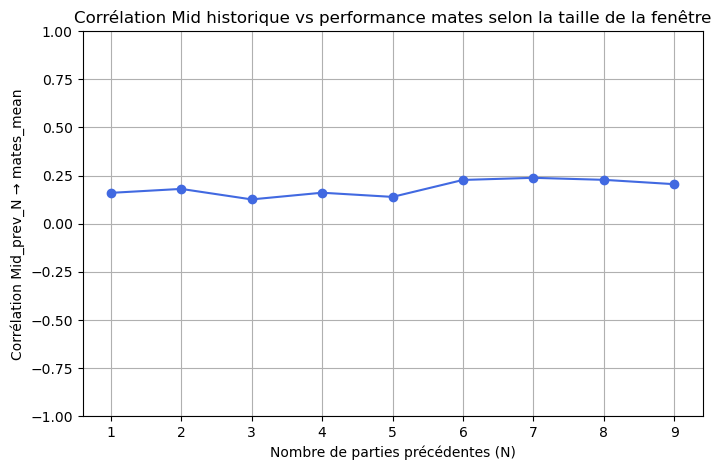


La fenêtre la plus significative est 7 parties précédentes avec une corrélation de 0.238


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm


# Charger le CSV
df = pd.read_csv("data.csv")

# Colonnes
my_role = 'Mid'
other_roles = ['Top', 'Jungle', 'Bot']

# Moyenne des mates pour chaque partie
df['mates_mean'] = df[other_roles].mean(axis=1)

# Fenêtres à tester
max_window = 9
window_results = {}

for window in range(1, max_window + 1):
    # Moyenne glissante du Mid sur les N parties précédentes
    df[f'Mid_prev_{window}'] = df[my_role].shift(1).rolling(window=window).mean()
    
    # Supprimer les lignes NA
    valid_df = df.dropna(subset=[f'Mid_prev_{window}', 'mates_mean'])
    
    # Calcul de la corrélation
    corr = valid_df[f'Mid_prev_{window}'].corr(valid_df['mates_mean'])
    window_results[window] = corr

# Afficher les résultats
print("Corrélations Mid historique → mates_mean selon la taille de la fenêtre :")
for window, corr in window_results.items():
    print(f"Fenêtre {window} parties précédentes : Corrélation = {corr:.3f}")

# Visualiser la corrélation selon la fenêtre
plt.figure(figsize=(8,5))
plt.plot(list(window_results.keys()), list(window_results.values()), marker='o', color='royalblue')
plt.title("Corrélation Mid historique vs performance mates selon la taille de la fenêtre")
plt.xlabel("Nombre de parties précédentes (N)")
plt.ylabel("Corrélation Mid_prev_N → mates_mean")
plt.ylim(-1,1)
plt.grid(True)
plt.show()

# Identifier la fenêtre la plus significative (corrélation absolue maximale)
best_window = max(window_results, key=lambda k: abs(window_results[k]))
print(f"\nLa fenêtre la plus significative est {best_window} parties précédentes avec une corrélation de {window_results[best_window]:.3f}")


In [2]:
df['Mid_prev_7'] = df['Mid'].shift(1).rolling(window=7).mean()

df['Mid_prev_7_cat'] = pd.cut(df['Mid_prev_7'], bins=[-np.inf, -0.3, 0.3, np.inf],
                              labels=['mauvais', 'neutre', 'bon'])


In [3]:
mates_by_cat = df.groupby('Mid_prev_7_cat')['mates_mean'].mean()
mates_by_cat_std = df.groupby('Mid_prev_7_cat')['mates_mean'].std()

print("Performance moyenne des mates selon catégorie Mid_prev_7 :")
print(mates_by_cat)

Performance moyenne des mates selon catégorie Mid_prev_7 :
Mid_prev_7_cat
mauvais   -3.333333e-01
neutre    -1.851852e-01
bon        9.796086e-18
Name: mates_mean, dtype: float64


C:\Users\Rafael\AppData\Local\Temp\ipykernel_3176\3208794971.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mates_by_cat = df.groupby('Mid_prev_7_cat')['mates_mean'].mean()
C:\Users\Rafael\AppData\Local\Temp\ipykernel_3176\3208794971.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mates_by_cat_std = df.groupby('Mid_prev_7_cat')['mates_mean'].std()


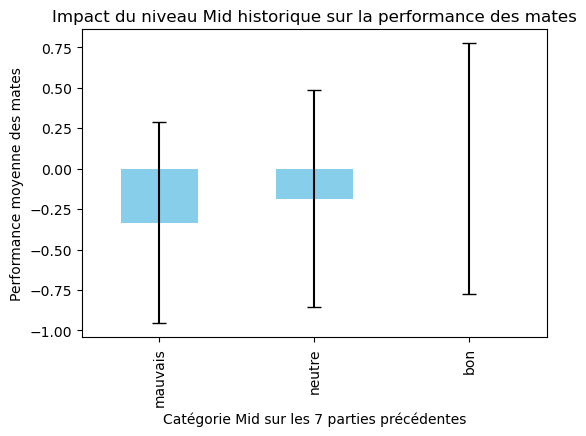

In [4]:
plt.figure(figsize=(6,4))
mates_by_cat.plot(kind='bar', yerr=mates_by_cat_std, color='skyblue', capsize=5)
plt.ylabel("Performance moyenne des mates")
plt.xlabel("Catégorie Mid sur les 7 parties précédentes")
plt.title("Impact du niveau Mid historique sur la performance des mates")
plt.show()


In [5]:
df

,Top,Jungle,Mid,Bot,Gold @10,R,mates_mean,Mid_prev_1,Mid_prev_2,Mid_prev_3,Mid_prev_4,Mid_prev_5,Mid_prev_6,Mid_prev_7,Mid_prev_8,Mid_prev_9,Mid_prev_7_cat
0,-1,0,1.0,-1,800,1,-0.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,1.0,1,4500,1,1.000000,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-1,0,-1.0,-1,950,-1,-0.666667,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-1,1,1.0,-1,-350,1,-0.333333,-1.0,0.0,0.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,-1,1.0,-1,2000,1,-0.333333,1.0,0.0,0.333333,0.50,NaN,NaN,NaN,NaN,NaN,NaN
5,0,-1,1.0,1,700,1,0.000000,1.0,1.0,0.333333,0.50,0.6,NaN,NaN,NaN,NaN,NaN
6,1,0,1.0,0,1600,1,0.333333,1.0,1.0,1.000000,0.50,0.6,0.666667,NaN,NaN,NaN,NaN
7,1,1,1.0,1,4500,1,1.000000,1.0,1.0,1.000000,1.00,0.6,0.666667,0.714286,NaN,NaN,bon
8,0,-1,1.0,0,1500,1,-0.333333,1.0,1.0,1.000000,1.00,1.0,0.666667,0.714286,0.750,NaN,bon
9,-1,-1,1.0,0,-2100,-1,-0.666667,1.0,1.0,1.000000,1.00,1.0,1.000000,0.714286,0.750,0.777778,bon


(merci chatgpt)

# Interprétation des résultats

## Catégorie « mauvais » (-0.333)
Quand ton niveau Mid sur les 7 parties précédentes est plutôt faible, la moyenne des performances de tes coéquipiers sur la partie suivante tend à être **négative**.  
Cela suggère que jouer mal sur la série précédente pourrait être associé à des coéquipiers moins performants.

## Catégorie « neutre » (-0.185)
Quand ton niveau Mid est moyen, la moyenne des coéquipiers est légèrement négative, mais moins que pour la catégorie « mauvais ».  
Tes coéquipiers ne sont pas aussi impactés que dans le scénario « mauvais ».

## Catégorie « bon » (~0)
Quand ton niveau Mid est bon sur les 7 parties précédentes, la moyenne des mates est proche de zéro.  
Cela signifie qu’un bon Mid ne crée pas de coéquipiers « négatifs » et peut être associé à des mates plus équilibrés ou légèrement meilleurs.

---

## Conclusions principales

- **Impact moyen** : Plus ton Mid est faible sur les 7 parties précédentes, plus il semble que tes coéquipiers aient tendance à moins bien jouer.
- **Fenêtre de 7 parties** : La corrélation que tu as calculée précédemment montre que cette période est celle où ton niveau Mid influence le plus tes coéquipiers.
- **Bonnes performances passées** : Elles n’augmentent pas drastiquement la performance des mates, mais elles empêchent un effet négatif.

💡 **Remarque** : la moyenne « bon » proche de 0 suggère un **plafond d’effet** — ton niveau Mid peut réduire l’impact négatif mais n’augmente pas énormément la performance des coéquipiers.


Impact de la performance mid relative aux performances des autres joueurs

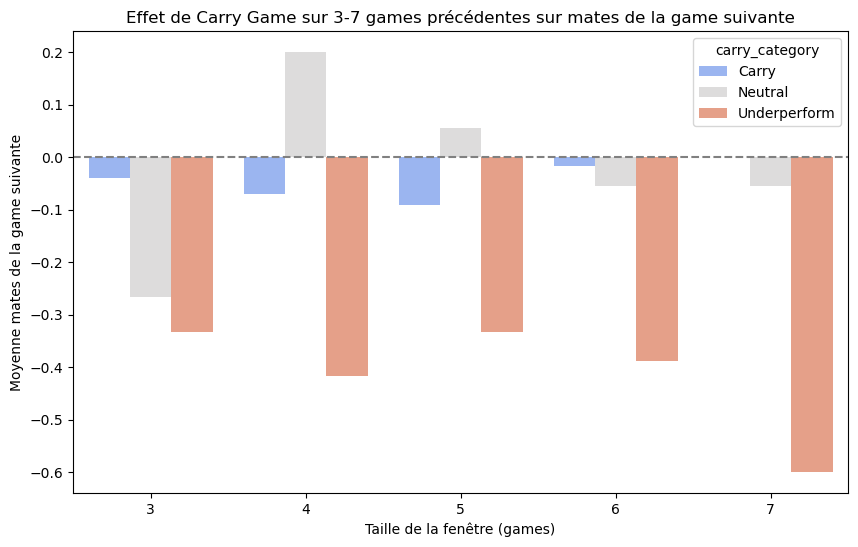

In [6]:
# Calculer la surperformance relative
df['relative_perf'] = df['Mid'] - df['mates_mean']

# Décaler mates_mean pour regarder la game suivante
df['mates_next'] = df['mates_mean'].shift(-1)

# Fonction pour calculer rolling moyenne et catégoriser Carry Game
def categorize_carry(df, window):
    col_name = f'relative_perf_roll{window}'
    df[col_name] = df['relative_perf'].rolling(window=window, min_periods=window).mean()
    
    # Catégoriser la rolling perf
    def carry_cat(x):
        if x > 0.2:   # seuil arbitraire pour considérer une surperformance
            return 'Carry'
        elif x < -0.2:
            return 'Underperform'
        else:
            return 'Neutral'
    
    df[f'carry_cat_{window}'] = df[col_name].apply(lambda x: carry_cat(x) if not pd.isna(x) else np.nan)
    return df

# Appliquer pour fenêtres de 3 à 7 games
for w in range(3,8):
    df = categorize_carry(df, w)

# Reformater les résultats pour long format
long_results = []

for w in range(3,8):
    col_roll = f'relative_perf_roll{w}'
    cat_col = f'carry_cat_{w}'
    df_valid = df.dropna(subset=[col_roll, 'mates_next'])
    
    summary = df_valid.groupby(cat_col).agg(
        mean_relative_perf=(col_roll,'mean'),
        mean_mates_next=('mates_next','mean'),
        count=('mates_next','count')
    ).reset_index()
    summary['window'] = w
    summary = summary.rename(columns={cat_col:'carry_category'})
    long_results.append(summary)

long_summary_df = pd.concat(long_results, ignore_index=True)

# Visualisation
plt.figure(figsize=(10,6))
sns.barplot(data=long_summary_df, x='window', y='mean_mates_next', hue='carry_category', palette='coolwarm')
plt.axhline(0, color='gray', linestyle='--')
plt.title('Effet de Carry Game sur 3-7 games précédentes sur mates de la game suivante')
plt.xlabel('Taille de la fenêtre (games)')
plt.ylabel('Moyenne mates de la game suivante')
plt.show()

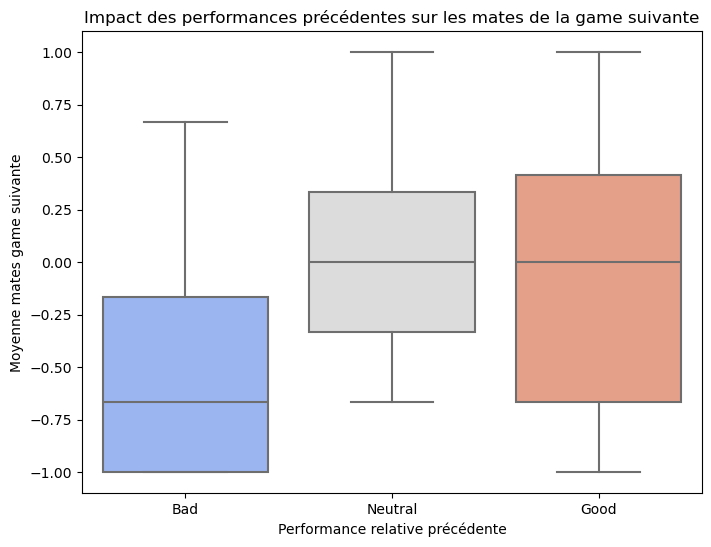

  prev_perf_cat  mean_mates_next  count
0           Bad        -0.454545     11
1          Good        -0.013889     24
2       Neutral         0.074074      9


In [12]:
df['relative_perf'] = df['Mid'] - df['mates_mean']

# Catégoriser la performance relative
def perf_category(x):
    if x > 0.2:       # seuil pour bonne perf
        return 'Good'
    elif x < -0.2:    # seuil pour mauvaise perf
        return 'Bad'
    else:
        return 'Neutral'

df['prev_perf_cat'] = df['relative_perf'].apply(perf_category)

# Décaler mates_mean pour regarder la game suivante
df['mates_next'] = df['mates_mean'].shift(-1)

# Boxplot pour visualiser l’effet
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='prev_perf_cat', y='mates_next', order=['Bad','Neutral','Good'], palette='coolwarm')
plt.title('Impact des performances précédentes sur les mates de la game suivante')
plt.xlabel('Performance relative précédente')
plt.ylabel('Moyenne mates game suivante')
plt.show()

# Moyenne des mates suivantes par catégorie
summary = df.groupby('prev_perf_cat').agg(
    mean_mates_next=('mates_next','mean'),
    count=('mates_next','count')
).reset_index()
print(summary)